In [344]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [348]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [349]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

In [350]:
object = yf.Ticker("TSLA")

In [351]:
tesla_data = object.history(period="max")

In [416]:
tesla_data.reset_index(inplace=True)
tesla_data.head()

,index,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [420]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

In [422]:
html_data = requests.get(url).text

In [423]:
soup = BeautifulSoup(html_data,"html.parser")

In [424]:
tables = soup.find_all('table')

In [489]:
for i,table in enumerate (tables):
    if("Tesla Quarterly Revenue" in str(table)):
        table_index = i

In [491]:
specific_table = tables[table_index]

In [493]:
specific_table_html = str(specific_table)
Table_object= BeautifulSoup(specific_table_html,"html.parser")

In [495]:
headers = [th.text for th in Table_object.find_all('th')]
data = []
for tr in Table_object.find_all('tr')[1:]:  # Skip the header row
    row = [td.text for td in tr.find_all('td')]
    data.append(row)


In [497]:
tesla_revenue = pd.DataFrame(data,columns=["Date", "Revenue"])


In [499]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"", regex=True)

<>:1: SyntaxWarning:

invalid escape sequence '\$'

<>:1: SyntaxWarning:

invalid escape sequence '\$'

C:\Users\n0r043t\AppData\Local\Temp\ipykernel_20132\1877950674.py:1: SyntaxWarning:

invalid escape sequence '\$'



In [501]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

In [503]:
tesla_revenue.tail()

,Date,Revenue
48,2010-09-30,31
49,2010-06-30,28
50,2010-03-31,21
52,2009-09-30,46
53,2009-06-30,27


In [443]:
object1 = yf.Ticker("GME")

In [445]:
gme_data = object1.history(period="max")

In [447]:
gme_data.reset_index(inplace=True)

In [451]:
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716073,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662209,1.603296,1.662209,6892800,0.0,0.0


In [525]:
url1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

In [629]:
html_data_2 = requests.get(url1).text


In [528]:
beautiful_soup = BeautifulSoup(html_data_2,"html.parser")

In [595]:
tables_2 = beautiful_soup.find_all('table')


In [597]:
for i,table in enumerate (tables_2):
    if("GameStop Quarterly Revenue" in str(table)):
        table_index = i


In [633]:
specific_table_2 = tables_2[table_index]


In [635]:
specific_table_html_2 = str(specific_table_2)
Table_object_2= BeautifulSoup(specific_table_html_2,"html.parser")


In [637]:
headers = [th.text for th in Table_object_2.find_all('th')]
data1 = []
for tr in Table_object_2.find_all('tr')[1:]:  # Skip the header row
    row1 = [td.text for td in tr.find_all('td')]
    data1.append(row1)


In [619]:
gme_revenue = pd.DataFrame(data1,columns = ["Date","Revenue"])


In [621]:
gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(',|\$',"", regex=True)

<>:1: SyntaxWarning:

invalid escape sequence '\$'

<>:1: SyntaxWarning:

invalid escape sequence '\$'

C:\Users\n0r043t\AppData\Local\Temp\ipykernel_20132\1655338250.py:1: SyntaxWarning:

invalid escape sequence '\$'



In [623]:
gme_revenue.dropna(inplace=True)
gme_revenue = gme_revenue[gme_revenue['Revenue'] != ""]
gme_revenue.tail()

,Date,Revenue
57,2006-01-31,1667
58,2005-10-31,534
59,2005-07-31,416
60,2005-04-30,475
61,2005-01-31,709


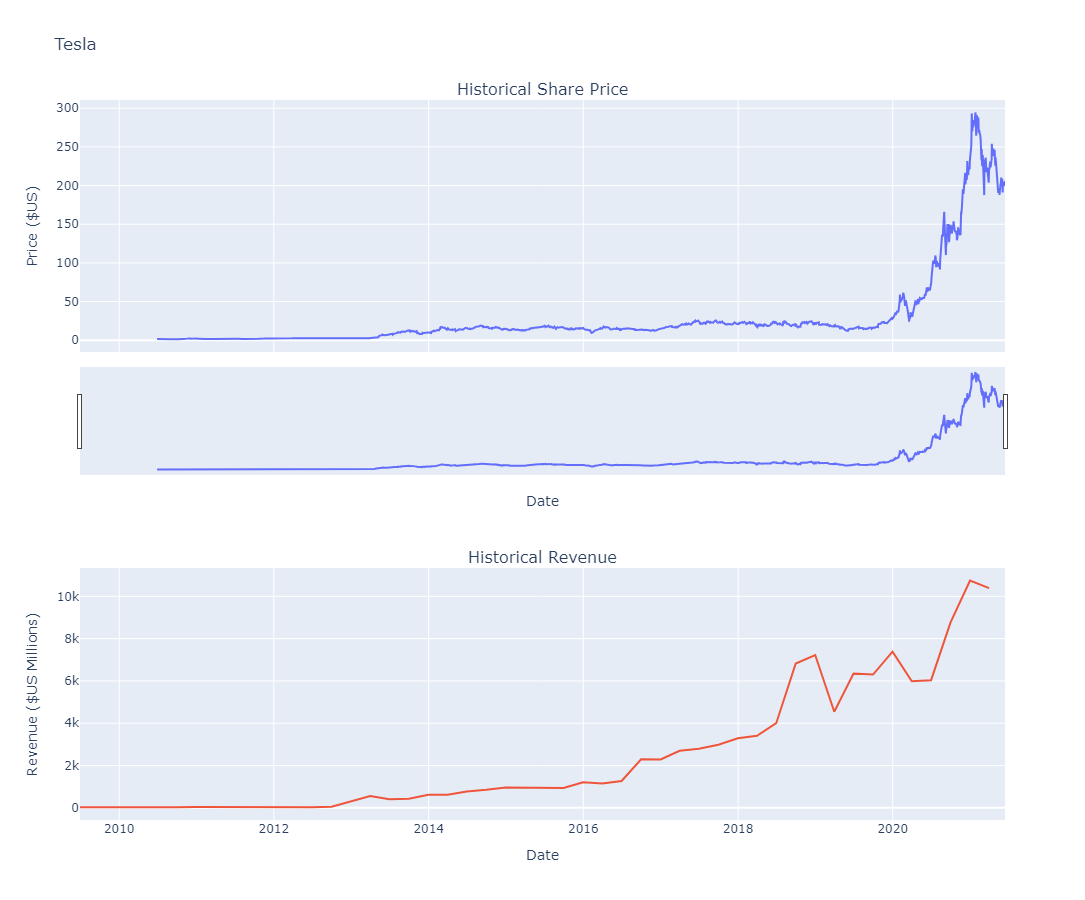

In [625]:
make_graph(tesla_data, tesla_revenue, 'Tesla')

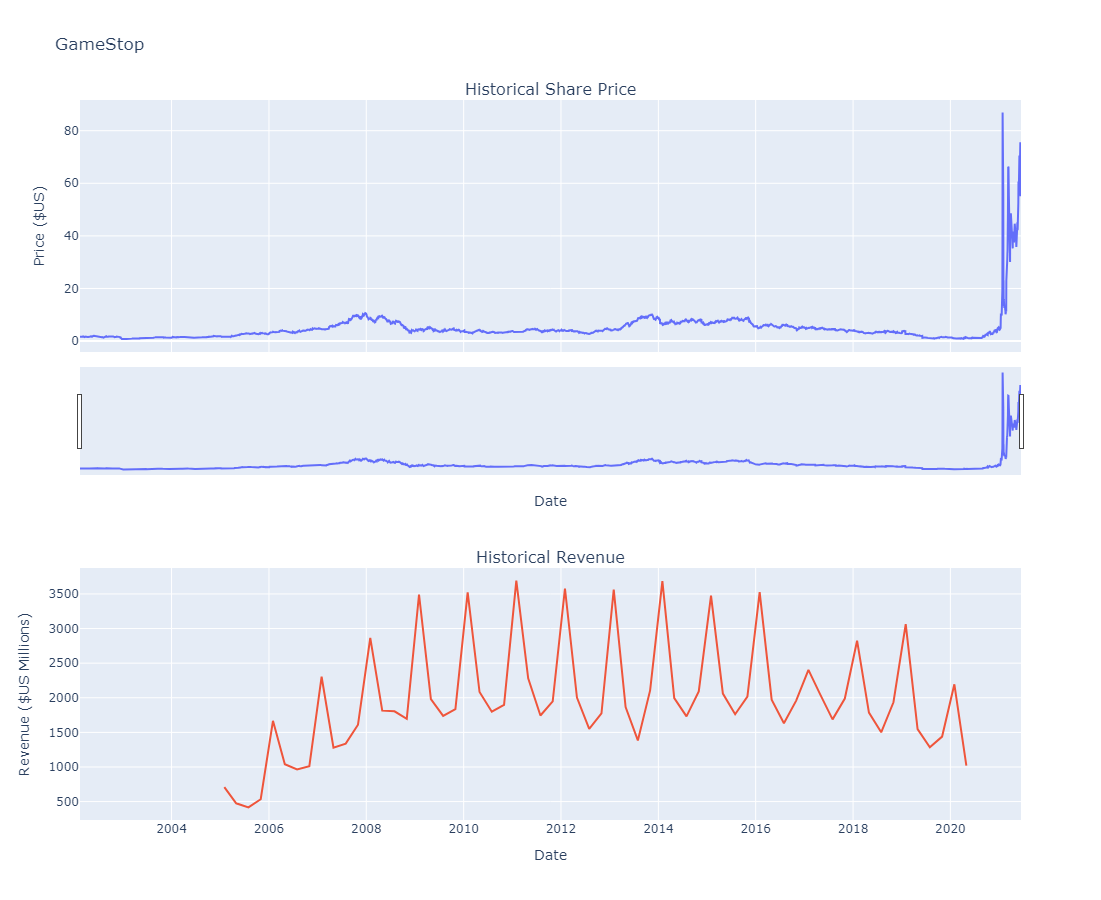

In [627]:
make_graph(gme_data, gme_revenue, 'GameStop')